In [2]:
import numpy as np
import pandas as pd
from ch6 import *

np.random.seed(42)
x   = np.random.normal(0, 1, 100)
eps = np.random.normal(0 ,1 , 100)

b0, b1, b2, b3 = [3, 2, -4, 5]
y = b0 + b1*x + b2*(x**2) + b3*(x**3) + eps

df = pd.DataFrame({'X'  : x,
                   'X2' : x**2,
                   'X3' : x**3,
                   'X4' : x**4,
                   'X5' : x**5,
                   'X6' : x**6,
                   'X7' : x**7,
                   'X8' : x**8,
                   'X9' : x**9,
                   'X10': x**10,
                   'y'  : y})

#model_subsets = best_subset(X=df.columns[:10], y='y', data=df)
#scores_plot(model_subsets)

In [29]:
def forward_stepwise(X, y, data):
    """Perform forward stepwise selection as described in this book page 207.
    Using BIC for getting the best model obtained.
    inputs:
    X: names of x column in list
    y: name of y in list
    data: the dataframe contains the dataset of X, y
    Returns list with best model (name, statsmodel) for for each n"""
    
    # get all model results
    model_subsets = []
    
    X_f = []
    best_models = []
    p_all  = X

    for i in range(len(p_all)):
        models = []
        for i in p_all:
            f = '{} ~ {}'.format(y, ' + '.join(X_f + [i]))

            # Fit model
            model = smf.ols(formula=f, data=data).fit()
            models.append((f, model))
        
        model_subsets.append(models)
        best_models.append(min_bic(models))
        X_f = [best_models[-1][0].split(' ~ ')[-1]]
        p_all = p_all.drop(X_f[0].split(" + ")[-1])

    return model_subsets, best_models

In [ ]:
X = df.columns.drop('Outstate')
y = 'Outstate'
data = df

# get all model results
model_subsets = []

X_f = []
best_models = []
p_all  = X

In [5]:
collage_df = pd.read_csv('../datasets/College.csv').drop('Unnamed: 0', axis=1)
collage_df.columns = [c.replace('.', '_') for c in collage_df.columns]

df = pd.get_dummies(collage_df, drop_first=True)

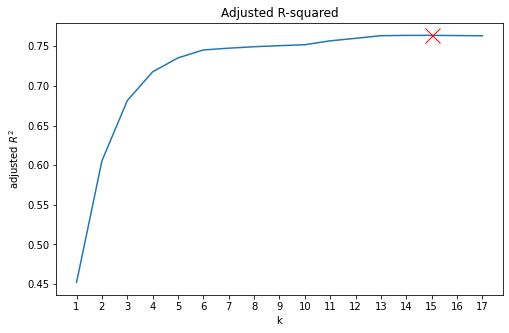

Model selected coefficients: 
Intercept     -1647.456229
Expend            0.200927
Private_Yes    2263.196367
Room_Board        0.883649
perc_alumni      41.553482
PhD              11.343333
Grad_Rate        23.646509
Personal         -0.226767
Terminal         24.171159
S_F_Ratio       -46.388747
Accept            0.802289
F_Undergrad      -0.095096
Apps             -0.299433
Top10perc        24.278763
Enroll           -0.536648
Books            -0.463780
dtype: float64
----------------------------------------------------



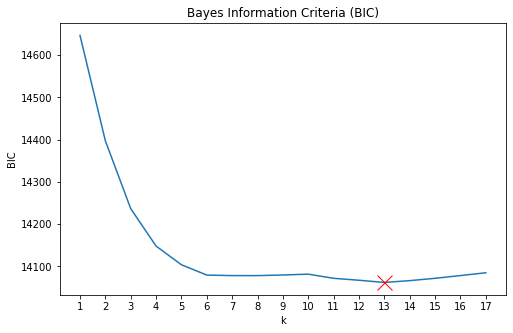

Model selected coefficients: 
Intercept     -1892.077136
Expend            0.198501
Private_Yes    2265.830169
Room_Board        0.888834
perc_alumni      41.012860
PhD              12.809180
Grad_Rate        23.626835
Personal         -0.249202
Terminal         23.650446
S_F_Ratio       -46.940609
Accept            0.718372
F_Undergrad      -0.168148
Apps             -0.283975
Top10perc        22.461257
dtype: float64
----------------------------------------------------



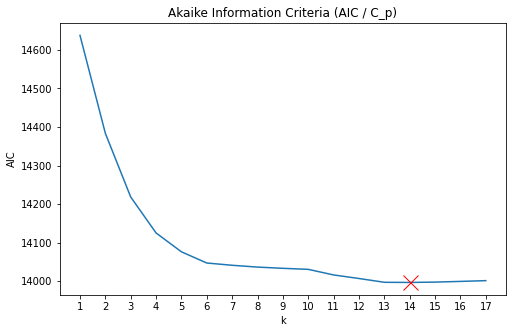

Model selected coefficients: 
Intercept     -1817.040106
Expend            0.200391
Private_Yes    2256.945524
Room_Board        0.874182
perc_alumni      41.950060
PhD              12.695061
Grad_Rate        23.831969
Personal         -0.247842
Terminal         22.972959
S_F_Ratio       -47.005597
Accept            0.802352
F_Undergrad      -0.095699
Apps             -0.299902
Top10perc        23.655285
Enroll           -0.537255
dtype: float64


In [30]:
model_subsets_fs, _              = forward_stepwise(df.columns.drop('Outstate'), 'Outstate', df)
model_subsets_bs, best_models_bs = backward_stepwise(df.columns.drop('Outstate'), 'Outstate', df)

scores_plot(model_subsets_fs)

In [11]:
_

[('Outstate ~ Expend',
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b6858aec70>),
 ('Outstate ~ Expend + Private_Yes',
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b685744910>),
 ('Outstate ~ Private_Yes + Room_Board',
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68579dd60>),
 ('Outstate ~ Room_Board + perc_alumni',
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68581de50>),
 ('Outstate ~ perc_alumni + S_F_Ratio',
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b68986ee20>),
 ('Outstate ~ S_F_Ratio + Grad_Rate',
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b6898b5eb0>),
 ('Outstate ~ Grad_Rate + Top10perc',
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b6898c7430>),
 ('Outstate ~ Top10perc + F_Undergrad',
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b6899077f0>),
 ('Outstate ~ F_Undergrad + To